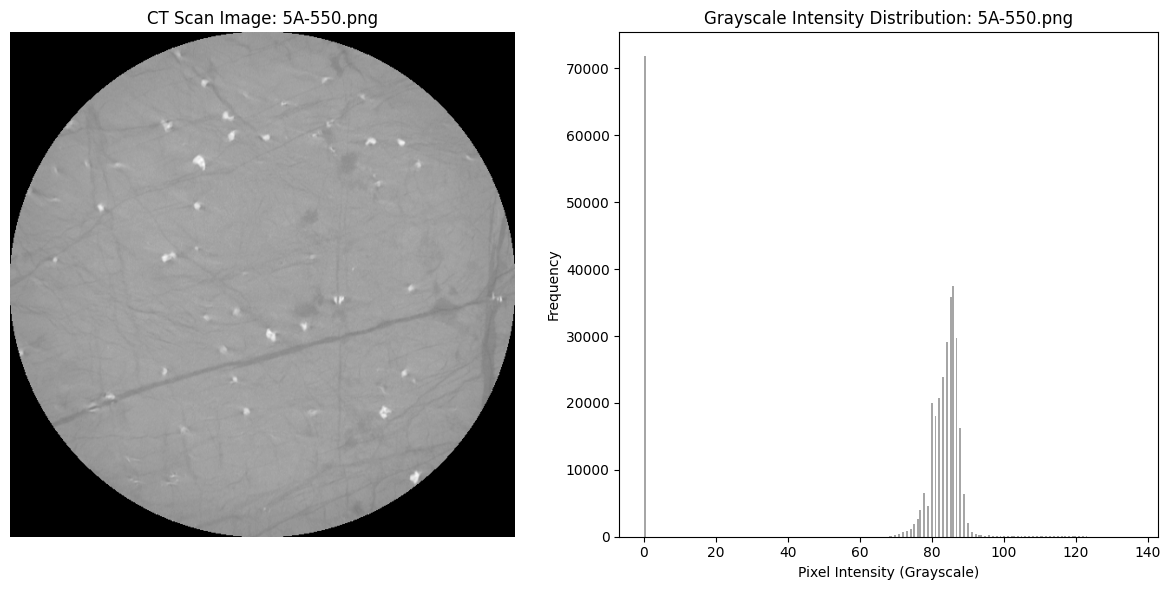

In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Folder path
folder_path = "/Users/anna/Desktop/X-RayCT/SlicesCropped/5A-220-crop/"

# Filenames
image_files = ["5A-550.png"]


# Create a figure for the images and histograms
plt.figure(figsize=(12, 6 * len(image_files)))


for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Display CT image
    plt.subplot(len(image_files), 2, 2 * i + 1)
    plt.imshow(ct_array, cmap="gray")
    plt.title(f"CT Scan Image: {image_file}")
    plt.axis("off")
    
    # Plot grayscale intensities
    plt.subplot(len(image_files), 2, 2 * i + 2)
    plt.hist(ct_array.flatten(), bins=256, color="gray", alpha=0.7)
    plt.title(f"Grayscale Intensity Distribution: {image_file}")
    plt.xlabel("Pixel Intensity (Grayscale)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

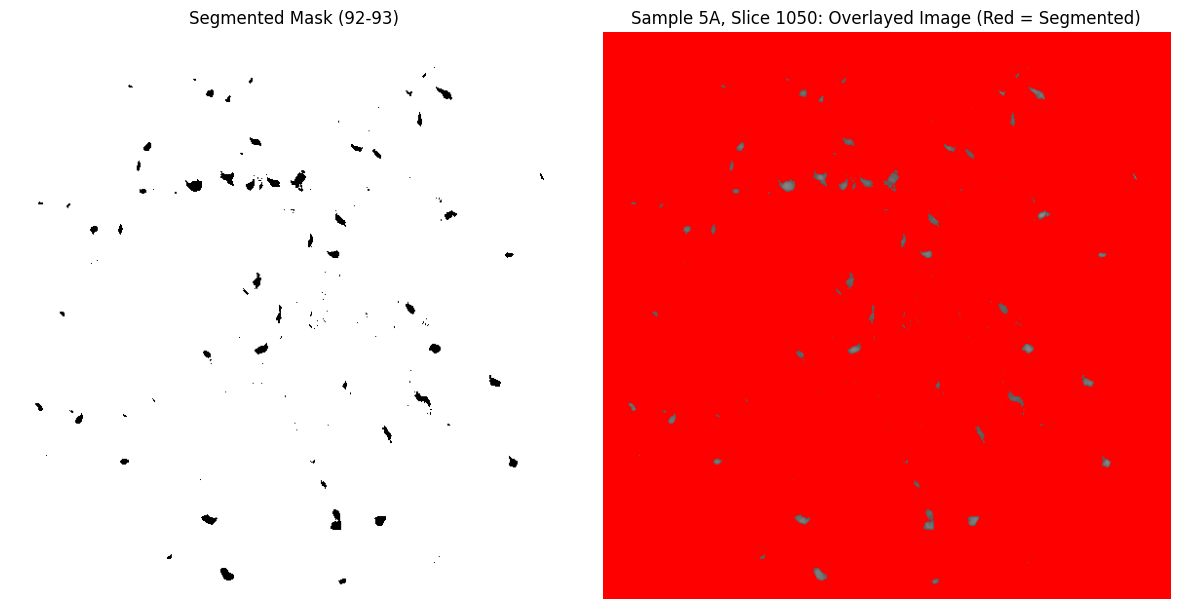

In [6]:
# Folder path
folder_path = "/Users/anna/Desktop/X-RayCT/SlicesCropped/5A-220-crop/"

# Filenames
#image_files = ["5A-100.png","5A-150.png","5A-200.png","5A-250.png","5A-300.png","5A-350.png","5A-400.png",
#             "5A-450.png","5A-500.png","5A-550.png","5A-600.png","5A-650.png","5A-700.png","5A-750.png",
 #              "5A-800.png","5A-850.png","5A-900.png","5A-950.png","5A-1000.png","5A-1050.png","5A-1100.png"
  #             ,"5A-1150.png","5A-1200.png"]
  
  # Filenames
image_files = ["5A-1050.png"]

# Carbonate threshold
lower_threshold = 92
upper_threshold = 93

# Create a figure for the images and overlays
plt.figure(figsize=(12, 6 * len(image_files)))

# Loop through each image file
for i, image_file in enumerate(image_files):
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Convert the mask to a white image
    white_mask = np.zeros((ct_array.shape[0], ct_array.shape[1], 3), dtype=np.uint8)
    white_mask[segmented_mask] = [255, 255, 255]  # Set segmented pixels to white
    
    # Convert grayscale image to RGB
    rgb_image = np.stack([ct_array] * 3, axis=-1)  # Convert single-channel grayscale to three-channel RGB
    
    # Create an overlay (set segmented areas to red)
    overlay = rgb_image.copy()
    overlay[segmented_mask] = [255, 0, 0]  # Set segmented pixels to red
    
    # Plot the images
    
    plt.subplot(len(image_files), 2, 2 * i + 2)
    plt.imshow(overlay)
    plt.title(f"Sample 5A, Slice 1050: Overlayed Image (Red = Segmented)")
    plt.axis("off")
    
    
    plt.subplot(len(image_files), 2, 2 * i + 1)
    plt.imshow(white_mask)
    plt.title(f"Segmented Mask (92-93)")
    #plt.title(f"Segmented Mask ({lower_threshold}-{upper_threshold})")
    plt.axis("off")
    
plt.savefig('/Users/anna/Desktop/5a1050.png')
plt.tight_layout()
plt.show()

# Close the plot to release resources
#plt.close()

In [7]:
# Folder path
folder_path = "/Users/anna/Desktop/X-RayCT/SlicesCropped/5A-220-crop/"

# Filenames
image_files = ["5A-150.png","5A-200.png","5A-250.png","5A-300.png","5A-350.png","5A-400.png",
             "5A-450.png","5A-500.png","5A-550.png","5A-600.png","5A-650.png","5A-700.png","5A-750.png",
               "5A-800.png","5A-850.png","5A-900.png","5A-950.png","5A-1000.png","5A-1050.png","5A-1100.png"
               ,"5A-1150.png","5A-1200.png"]

# Intensity threshold
lower_threshold = 92
upper_threshold = 93

total_core_pixels = 0
total_core_segmented_pixels = 0

# Loop through each image file
for image_file in image_files:
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Create a mask for the segmented region
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold)
    
    # Calculate percentage
    total_pixels = ct_array.size
    segmented_pixels = np.sum(segmented_mask)
    percentage = (segmented_pixels / total_pixels) * 100
    
    print(f"Image: {image_file} - Percentage of pixels in range {lower_threshold}-{upper_threshold}: {percentage:.2f}%")
    
    # Accumulate totals for entire core
    total_core_pixels += total_pixels
    total_core_segmented_pixels += segmented_pixels

# Calculate overall percentage for the entire core
if total_core_pixels > 0:
    total_core_percentage = (total_core_segmented_pixels / total_core_pixels) * 100
    print(f"Total Core - Percentage of pixels in range {lower_threshold}-{upper_threshold}: {total_core_percentage:.2f}%")

Image: 5A-150.png - Percentage of pixels in range 92-93: 0.13%
Image: 5A-200.png - Percentage of pixels in range 92-93: 0.25%
Image: 5A-250.png - Percentage of pixels in range 92-93: 0.24%
Image: 5A-300.png - Percentage of pixels in range 92-93: 0.19%
Image: 5A-350.png - Percentage of pixels in range 92-93: 0.15%
Image: 5A-400.png - Percentage of pixels in range 92-93: 0.22%
Image: 5A-450.png - Percentage of pixels in range 92-93: 0.22%
Image: 5A-500.png - Percentage of pixels in range 92-93: 0.23%
Image: 5A-550.png - Percentage of pixels in range 92-93: 0.19%
Image: 5A-600.png - Percentage of pixels in range 92-93: 0.25%
Image: 5A-650.png - Percentage of pixels in range 92-93: 0.21%
Image: 5A-700.png - Percentage of pixels in range 92-93: 0.17%
Image: 5A-750.png - Percentage of pixels in range 92-93: 0.24%
Image: 5A-800.png - Percentage of pixels in range 92-93: 0.19%
Image: 5A-850.png - Percentage of pixels in range 92-93: 0.13%
Image: 5A-900.png - Percentage of pixels in range 92-93

In [9]:
import os
import numpy as np
from PIL import Image

# Folder path
folder_path = "/Users/anna/Desktop/X-RayCT/SlicesCropped/5A-220-crop/"

# Filenames
image_files = ["5A-150.png", "5A-200.png", "5A-250.png", "5A-300.png", "5A-350.png", "5A-400.png",
               "5A-450.png", "5A-500.png", "5A-550.png", "5A-600.png", "5A-650.png", "5A-700.png", "5A-750.png",
               "5A-800.png", "5A-850.png", "5A-900.png", "5A-950.png", "5A-1000.png", "5A-1050.png", "5A-1100.png",
               "5A-1150.png", "5A-1200.png"]

# Intensity threshold
lower_threshold = 92
upper_threshold = 93

total_core_pixels = 0
total_core_segmented_pixels = 0

# Loop through each image file
for image_file in image_files:
    # Full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Load the image and convert to grayscale
    ct_image = Image.open(image_path).convert("L")
    
    # Convert the image to a NumPy array
    ct_array = np.array(ct_image)
    
    # Mask to exclude black pixels
    valid_pixels_mask = ct_array > 0

    # Mask for the segmented region within valid pixels
    segmented_mask = (ct_array >= lower_threshold) & (ct_array <= upper_threshold) & valid_pixels_mask

    # Count pixels
    total_valid_pixels = np.sum(valid_pixels_mask)
    segmented_pixels = np.sum(segmented_mask)
    
    # Calculate percentage
    percentage = (segmented_pixels / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    
    print(f"Image: {image_file} - % in range {lower_threshold}-{upper_threshold} (excluding black): {percentage:.2f}%")
    
    # Accumulate totals for entire core
    total_core_pixels += total_valid_pixels
    total_core_segmented_pixels += segmented_pixels

# Calculate overall percentage for the entire core
if total_core_pixels > 0:
    total_core_percentage = (total_core_segmented_pixels / total_core_pixels) * 100
    print(f"\nTotal Core - % of pixels in range {lower_threshold}-{upper_threshold} (excluding black): {total_core_percentage:.2f}%")


Image: 5A-150.png - % in range 92-93 (excluding black): 0.16%
Image: 5A-200.png - % in range 92-93 (excluding black): 0.31%
Image: 5A-250.png - % in range 92-93 (excluding black): 0.30%
Image: 5A-300.png - % in range 92-93 (excluding black): 0.24%
Image: 5A-350.png - % in range 92-93 (excluding black): 0.19%
Image: 5A-400.png - % in range 92-93 (excluding black): 0.28%
Image: 5A-450.png - % in range 92-93 (excluding black): 0.27%
Image: 5A-500.png - % in range 92-93 (excluding black): 0.30%
Image: 5A-550.png - % in range 92-93 (excluding black): 0.24%
Image: 5A-600.png - % in range 92-93 (excluding black): 0.31%
Image: 5A-650.png - % in range 92-93 (excluding black): 0.27%
Image: 5A-700.png - % in range 92-93 (excluding black): 0.21%
Image: 5A-750.png - % in range 92-93 (excluding black): 0.30%
Image: 5A-800.png - % in range 92-93 (excluding black): 0.24%
Image: 5A-850.png - % in range 92-93 (excluding black): 0.17%
Image: 5A-900.png - % in range 92-93 (excluding black): 0.21%
Image: 5